<a href="https://colab.research.google.com/github/dahyun723/ESAA_1/blob/main/week6_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬 머신러닝 완벽가이드 ch4.3-6 (210p-244p)

#03.앙상블 학습
앙상블 학습 개요
앙상블 학습(Ensemble Learning)을 통한 분류는 여러 개의 분류기(Classifier)를 생성하고 그 예측을 결합함 -> 정확한 최종 예측을 도출하는 기법
단일 분류기보다 신뢰성이 높다
대부분의 정형 데이터 분류시에 뛰어난 성능을 나타내고 있다

앙상블 알고리즘의 대표격인 랜덤포레스트와 그래디언트 부스팅 알고리즘은 뛰어난 성능과 쉬운 사용, 다양한 활동도로 인해 그간 분석가 및 데이터 과학자들에게 애용

데이터 과학자들이 기량을 겨루는 오픈 플랫폼인 캐글에서 매력적인 솔루션으로 불리는 XGBoost, 그리고 XGBoost와 유사한 예측 성능을 가지면서도 훨씬 빠른 수행속도를 가진 LifhtGBM, 여러가지 모델의 결과를 기반으로 메타 모델을 수집하는 스태킹(Stacking)을 포함해 다양한 유형의 앙상블 알고리즘이 머신러닝의 선도 알고리즘으로 인기를 모으고 있다

XGBoost, LightGBM과 같은 최신의 앙상블모델 한 두개만 잘 알고 있어도 정형 데이터의 분류나 회귀 분야에서 예측 성능이 매우 뛰어난 모델을 쉽게 만들 수 있다

***
앙상블 학습 유형
* 보팅(Voting)
* 배깅(Bagging)
* 부스팅(Boosting) 등
***
보팅과 배깅은 여러개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식

 보팅과 배깅의 다른 점은 보팅의 경우 일반적으로 서로 다른 알고리즘을 가진 분류기를 결합하는것/ 배깅은 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만, 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행해 보팅을 수행하는 것

 대표적인 배깅 방식 : 랜덤 포레스트 알고리즘
 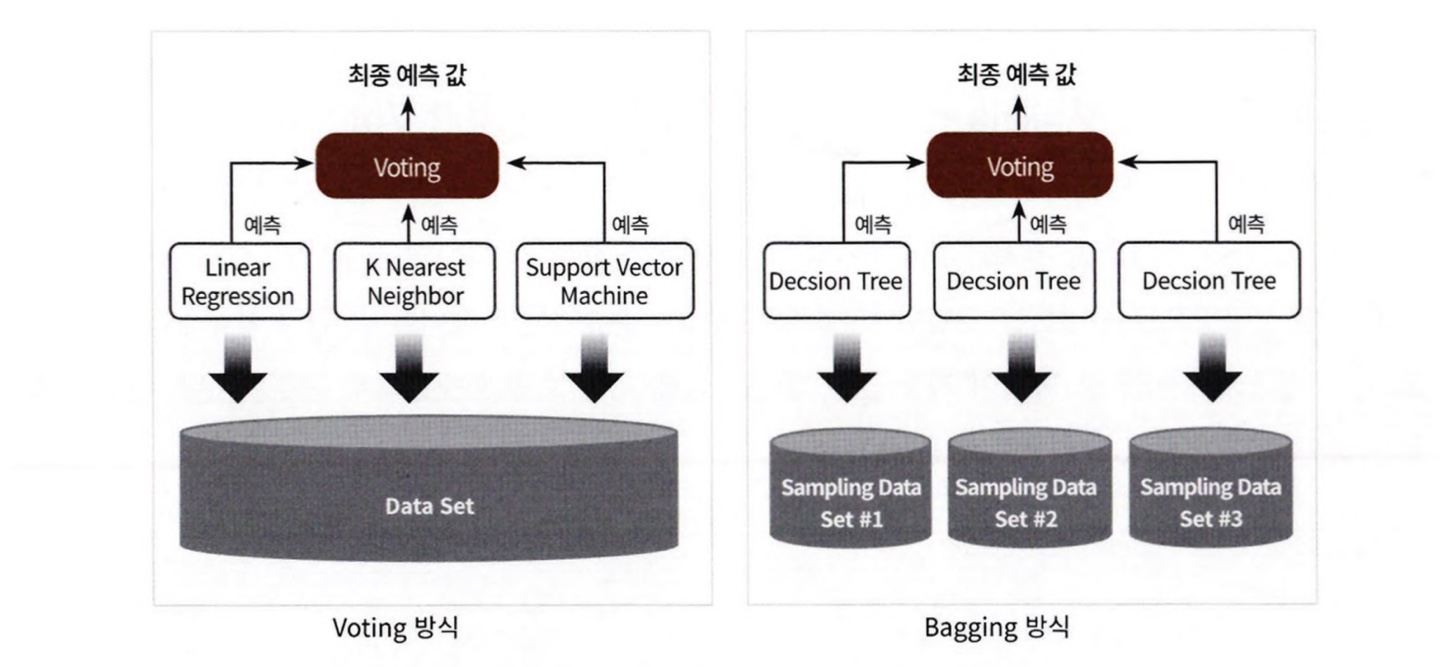

보팅 분류기 : 선형회귀, K 최근접 이웃, 서포트 벡터 머신이라는 3개의 ML알고리즘이 같은 데이터 세트에 대해서 학습하고 예측한 결과를 가지고 보팅을 통해 최종 예측 결과를 선정하는 방식

배깅분류기 : 단일 ML알고리즘으로 여러 분류기가 학습으로 개별 예측을 하는데, 학습하는 데이터 세트가 보팅 방식과는 다르다
개별 분류기에 할당된 학습 데이터는 원본 학습 데이터를 샘플링해 추출하는데, 이렇게 개별 classifiier에게 데이터를 샘플링해서 푸풀하는 방식을 부트스트래핑 분할 방식이라고 부른다

###보팅 분류기(Voting classifier)
보팅 방식의 앙상블을 이용해 위스콘신 유방암 데이터 세트를 예측분석

위스콘신 유방암 데이터 세트 : 유방암의 악성종양, 양성종양 여부를 결정하는 이진 분류 데이터 세트

사이킷런은 load_breast_cancer()함수를 통해 자체에서 위스콘신 유방암 데이터 세트를 생성할 수 있다

In [ ]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


로지스틱 회귀와 KNN을 기반으로 소프트 보팅 방식으로 새롭게 보팅 분류기를 만든다

In [ ]:
#개별 모델은 로지스틱 회귀와 KNN임
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)

#개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

In [ ]:
#VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도 : {0:.4f}',format(accuracy_score(y_test, pred)))

Voting 분류기 정확도 : {0:.4f} 0.956140350877193


In [ ]:
#개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
  classifier.fit(X_train, y_train)
  pred = classifier.predict(X_test)
  class_name= classifier.__class__.__name__
  print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))


LogisticRegression 정확도: 0.9474
KNeighborsClassifier 정확도: 0.9386


보팅 분류기가 정확도가 높다
보팅으로 여러개의 기반 분류기를 결합한다고 무조건 기반 분류기보다 예측 성능이 향상되지는 않는다

데이터 특성과 분포에 따라 기반 분류기 중 가장 좋은 분류기의 성능이 보팅했을 때보다 나을 수도 있음

보팅을 포함해 배깅과 부스팅의 앙상블 방법은 전반적으로 단일 ML알고리즘보다 뛰어난 성능을 가지는 경우가 많다

단일 ML알고리즘이 뛰어단 성능 발휘하더라도 현실 세계에서는 다양한 변수와 예측이 어려운 규칙으로 구성

ML 모델의 성능은 다양한 테스트 데이터에 의해서 검증됨
어떻게 높은 유연성을 가지고 현실에 대처할 수 있는가가 중요한 평가요소

-> 편향-분산 트레이드오프는 ML 모델이 극복해야할 과제

앙상블 학습에서는 결정트리 알고리즘의 단점을 수십개 수천개의 매우 많은 분류기를 결합해 다양한 상황을 학습하게 함으로써 극복하고 있다
결정 트리 알고리즘의 장점은 그대로 취하고 단점은 보완하면서 편향 - 분산 트레이드오프의 효과를 극대화할 수 있다는 것

##04. 랜덤 포레스트

배깅은 앞에서 소개한 보팅과는 다르게 같은 알고리즘으로 여러 개의 분류기를 만들어서 보팅으로 최종 결정하는 알고리즘

배깅의 대표적인 알고리즘 : 랜덤 포레스트
다재다능한 알고리즘
앙상블 알고리즘 중 비교적 빠른 수행 속도
다양한 영역에서 높은 예측 성능임

랜덤 포레스트의 기반 알고리즘 : 결정트리
여러개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정

부트스트래핑(bootstrapping) 분할 방식
: 여러 개의 데이터 세트를 중첩되게 분리하는 것

이렇게 데이터가 중첩된 개별 데이터 세트에 결정 트리 분류기를 각각 적용하는 것이 랜덤 포레스트

사이킷런은 RandomForestClassifier클래스를 통해 랜덤 포레스트 기반의 분류를 지원

사용자 행동 인식 데이터 세트를 RandomForestClassifier을 이용해 예측

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving X_train.txt to X_train.txt
Saving y_train.txt to y_train.txt


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving X_test.txt to X_test.txt
Saving y_test.txt to y_test.txt


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving features.txt to features.txt


In [ ]:
import pandas as pd

def get_human_dataset():
    feature_name_df = pd.read_csv('features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])

    # Get feature names and remove duplicates by converting to set and back to list
    feature_name = feature_name_df.iloc[:, 1].values.tolist()
    feature_name = list(dict.fromkeys(feature_name)) # Removing duplicate column names

    X_train = pd.read_csv('X_train.txt', sep='\s+', names=feature_name)
    X_test = pd.read_csv('X_test.txt', sep='\s+', names=feature_name)
    y_train = pd.read_csv('y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('y_test.txt', sep='\s+', header=None, names=['action'])

    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset()를 이용해 학습/테스트용 DataFrame 반환

X_train, X_test, y_train, y_test = get_human_dataset()

#랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf =RandomForestClassifier(random_state=0, max_depth=8)
rf_clf.fit(X_train,y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9155


랜덤 포레스트는 사용자 행동 인식 데이터 세트에 대해 약 91.96%의 정화도를 보여준다

###랜덤 포레스트 하이퍼 파라미터 및 튜닝
트리 기반의 앙상블 알고리즘의 단점 : 하이퍼 파라미터가 너무 많고 그로 인해서 튜닝을 위한 시간이 많이 소모된다
많은 시간을 소모했지만 튜닝 후 에측 성능이 크게 향상되는 경우가 많지 않다

* n_estimators : 랜덤 포레스트에서 결정 트리의 개수를 지정 디폴트 =10개 많이 설정할 수록 좋은 성능을 기대할 수 있지만 계속 증가시킨다고 성능이 무조건 향상은 X 늘릴 수록 학습 수행 시간이 오래걸림
* max_fratures 결정 트리에 사용된 max_features 파라미터와 같다
* max_depth나 samples_leat, min_samples_split 와 같이 결정 트리에서 과적합을 개선하기 위해서 사용



In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [8, 16, 24],
    'min_samples_leaf' : [1, 6, 12],
    'min_samples_split' : [2, 8, 16]
}

# RanmonForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [8, 16, 24],
                         'min_samples_leaf': [1, 6, 12],
                         'min_samples_split': [2, 8, 16]})

In [ ]:
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 16, 'min_samples_leaf': 1, 'min_samples_split': 2}
최고 예측 정확도: 0.9086


In [ ]:
rf_clf1 = RandomForestClassifier(n_estimators=100, max_depth=16, min_samples_leaf=6, min_samples_split=2, random_state=0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9308


피처 중요도를 막대그래프로 시각화

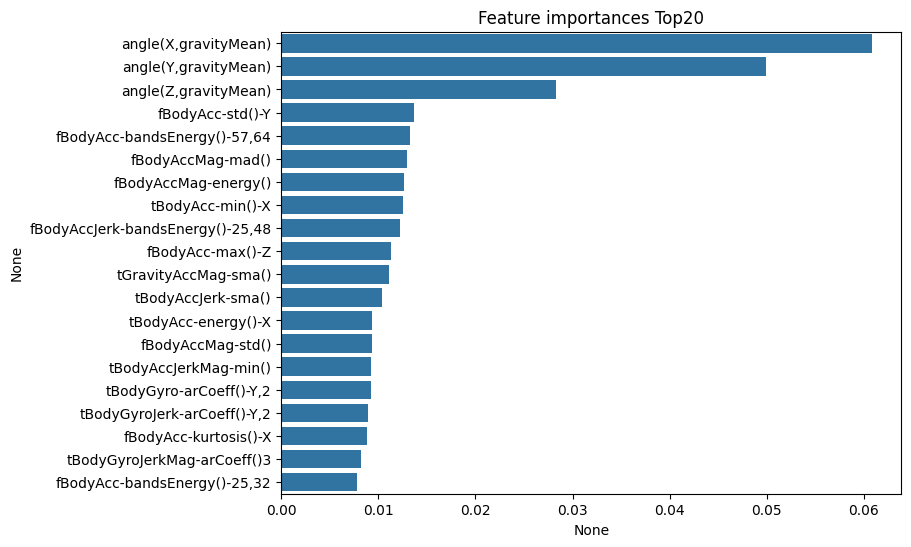

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

##GMB(Gradient Boosting Machine)
부스팅 알고리즘은 여러 개의 약한 학습기를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해나가면서 학습

부스팅의 대표적인 구현 : AdaBoost, 그래디언트 부스트

에이다부스트가 어떻게 학습을 진행하나
* step 1은 첫 번째 약한 학습기(weak learner)가 분류 기준 1로 +와 -를 분류한 것
* step 2 : 이 오류데이터에 대해서 가중치값 부여
* step 3 : 두번째 약한 학습기가 분류기준 2로 + -분류
* step 4 : 잘못 분류된 이 - 오류 데이터에 대해 약한 학습기가 잘 분류할 수 있게 더 큰 가중치 부여
* step 5 : 세번째 약한 학습기가 분류기준 3으로 +-를 구분하고 오류데이터를 찾는다
* 맨 아래 : 첫번째 두번째 세번째 약한 학습기를 모두 결합한 결과 예측 -> 개별 약한 학습기보다 훨씬 정확도가 높다

GBM도 에이다부스트와 유사하나, 가중치 업데이트를 경사 하강법을 이용하는 것이 큰 차이다
오류값은 실제값 -예측값

경사하강법(Gradient Decvent)
: 오류식 h(x) = y-F(x)을 최소화하는 방향성을 가지고 반복적으로 가중치 값을 업데이트하는 것

반복수행을 통해 오류를 최소화할 수 있도록 가중치의 업데이트 값을 도출하는 기법

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

#GBM 수행 시간 측정을 위함. 시작 시간 설정
start_time = time.time

gd_clf=GradientBoostingClassifier(random_state=0)
gd_clf.fit(X_train, y_train)
gd_pred = gd_clf.predict(X_test)
gd_accuracy = accuracy_score(y_test, gd_pred)

print('GBM 정확도 : {0:.4f}'.format(gb_accuracy))
print("GBM 수행시간: {0:.1f}초".format(time.time()-start_time))

NameError: name 'get_human_dataset' is not defined

기본 하이퍼 파라미터만으로 약 93퍼의 예측 정확도로 앞의 랜덤 포레스트보다 나은 예측 성능을 나타낸다

일반적으로 GBM이 랜덤포레스트 보다 예측 성능이 조금 뛰어나다
하지만 수행시간이 오래걸리고, 하이퍼 파라미터 튜닝노력도 더 필요하다

###GBM 하이퍼 파라미터
* loss : 경사 하강법에서 사용할 비용함수 지정 특별한 이유가 없으면 기본값인'deviance'를 그대로 적용
* learning_rate: GBM이 학습을 진행할 때마다 적용하는 학습률
Weak learner 가 순차적으로 오류값을 보정해나가는데 적용하는 계수
0~1 사이값을 지정할 수 있으며 기본값은 0.1
너무 작은 값을 적용하면 업데이트 되는 값이 작아져서 최소 오류값을 찾아 예측 성능이 높아질 가능성이 높다
반대로 큰 값을 적용하면 최소 오류값을 찾지 못하고 그냥 지나쳐 버려 예측 성능이 떨어질 가능성이 높아지지만, 빠른 수행이 가능하다
* n_estimators : weak learner 의 개수 weak learner 가 순차적으로 오류를 보정하므로 개수가 많을 수록 예측 성능이 일정 수준까지는 좋아질 수 있다
기본값 =100
* subsample : weak learner가 학습에 사용하는 데이터의 샘플링 비율이다
기본값 = 1 이는 전체 학습 데이터를 기반으로 학습한다는 의미
과적합이 염려되면 1보다 작은 값을 입력

GBM에서 GridSearchCV를 이용하여 하이퍼 파라미터 튜닝 실습은 수행시간이 너무 오래걸려서 생략


##06. XGBoost(eXtra Gradient Boost)
XGBoost는 트리 기반의 앙상블 학습에서 가장 각광받고 있는 알고리즘
GBM에 기반하고 있지만 GBM의 단점인 느링 수행시간 및 과적합 규제부재 등을 해결해서 매우 각광
병렬 CPU환경에서 병렬 학습이 가능

In [ ]:
#XGBoost 설치
!pip install xgboost=1.5.0

ERROR: Invalid requirement: 'xgboost=1.5.0': Expected end or semicolon (after name and no valid version specifier)
    xgboost=1.5.0
           ^
Hint: = is not a valid operator. Did you mean == ?


In [ ]:
#XGBoost모듈이 정상적으로 임포트됐는지 확인해 설치가 성공적으로 수행됐는지 검증
import xgboost as xgb
from xgboost import XGBClassifier

###파이썬 래퍼 XGBoost 하이퍼 파라미터
XGBoost는 GBM과 유사한 하이퍼 파라미터를 동일하게 가지고 있으며 여기에 조기중단, 과적합을 규제하기 위한 하이퍼 파라미터 추가됨
파라미터 명이 다르기 때문에 주의
파이썬 래퍼 vs 사이킷런 래퍼

파이썬 래퍼 XGBoost 하이퍼 파라미터
* 일반 파라미터 : 일반적으로 실행시 스레드의 개수나 silent 모드 등의 선택을 위한 파라미터 디폴트 파라미터 값을 바꾸는 경우는 거의 없다
* 부스터 파라미터 : 트리 최적화, 부스팅, regularization 등과 관련 파라미터 지칭
* 학습 태스크 파라미터 : 학습 수행 시의 객체 함수, 평가를 위한 지표 등을 설정하는 파라미터

대부분의 하이퍼 파라미터는 Booster 파라미터에 속함

**주요일반 파라미터**
* booster : gbtree(tree based model) 또는 gbinear(linear model) 선택, 디폴트는 gbtree
* silent : 디폴트는 0이며, 출력 메시지를 나타내고 싶지 않을 경우 1로 설정
* nthread : CPU의 실행 스레드 개수를 조정하며, 디폴트는 CPU의 전체 스레드를 다 사용하는 것

**주요 부스터 파리미터**
* eta~~~~

학습 태스크 파라미터
*


뛰어난 알고리즘일 수록 파라미터를 튜닝할 필요가 적다
파라미터 튜닝에 들이는 공수 대비 성능 향상 효과가 높지 않은 경우가 대부분이다
파라미터를 튜닝하는 경우의 수는 여러가지 상황에 따라 달라짐

**과적합문제가 심각하다면**
* eta 값을 낮춘다
* max_depth 값을 낮춘다
* min_child_weight 값을 높인다
* gamma 값을 높인다
* 또한 subsample과 colsample_bytree를 조정하는 것도 트리가 너무 복잡하게 생성되는 것을 막아 과적합 문제에 도움이 될 수 있다

In [ ]:
import xgboost

print(xgboost.__version__)

2.1.1


###파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측
위스콘신 유방암 데이터세트를 활용하여 파이썬 래퍼 XGBoost API 사용법 학습
xGBoost의 파이썬 패키지인 xgboost는 자체적으로 교차검증, 성능 평가, 피처 중요도의 시각화를 가지고 있다


In [ ]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
features=dataset.data
labels = dataset.target

cancer_df = pd.DataFrame(data=features, columns=dataset.feature_names)
cancer_df['target']=labels
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [ ]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
target
1    357
0    212
Name: count, dtype: int64


In [ ]:
#cancer_df 에서 feature용 dataFrame과 Label용 Series 객체 추출
#맨 마지막 칼럼이 Label임 Feature용 DataFrame은 cancer_df의 첫번째 칼럼에서 맨 마지막 두번째 칼럼까지를:-1 슬라이싱으로 추출
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:,-1]

#전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

#위에서 만든 X_trai, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)

print(X_train.shape, X_test.shape)
print(X_tr.shape, X_val.shape)

(455, 30) (114, 30)
(409, 30) (46, 30)


In [ ]:
#만약 구버전 XGBoost에서 DataFrame으로 DMatriix 생성이 안 될 경우 X_train.values로 넘파이 변환
#학습, 검증, 테스트용 DMatrix를 생성
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [ ]:
params= { 'max_depth':3,
        'eta': 0.05,
        'objective':'binary:logistic',
        'eval_metric':'logloss'
        }
num_rounds=400

In [ ]:
#학습 데이터 셋은 'train' 또는 평가데이터 셋은 'eval'로 명기한다
eval_list = [(dtr,'train'),(dval,'eval')] #또는 eval_list = [(dval, 'eval')]만 명기해도 무방

#하이퍼 파라미터 early stopping 파라미터를 train()함수의 파라미터로 전달
xgb_model = xgb.train(params=params, dtrain=dtr, num_boost_round=num_rounds, early_stopping_rounds=50, evals=eval_list)

[0]	train-logloss:0.62480	eval-logloss:0.63104
[1]	train-logloss:0.58674	eval-logloss:0.60478
[2]	train-logloss:0.55226	eval-logloss:0.58223
[3]	train-logloss:0.52086	eval-logloss:0.56184
[4]	train-logloss:0.49192	eval-logloss:0.54118
[5]	train-logloss:0.46537	eval-logloss:0.52223
[6]	train-logloss:0.44029	eval-logloss:0.50287
[7]	train-logloss:0.41666	eval-logloss:0.48620
[8]	train-logloss:0.39525	eval-logloss:0.46974
[9]	train-logloss:0.37542	eval-logloss:0.45497
[10]	train-logloss:0.35701	eval-logloss:0.44131
[11]	train-logloss:0.33982	eval-logloss:0.43134
[12]	train-logloss:0.32297	eval-logloss:0.41972
[13]	train-logloss:0.30725	eval-logloss:0.40902
[14]	train-logloss:0.29327	eval-logloss:0.39883
[15]	train-logloss:0.27946	eval-logloss:0.38968
[16]	train-logloss:0.26691	eval-logloss:0.38150
[17]	train-logloss:0.25473	eval-logloss:0.37368
[18]	train-logloss:0.24385	eval-logloss:0.36666
[19]	train-logloss:0.23338	eval-logloss:0.35994
[20]	train-logloss:0.22320	eval-logloss:0.35374
[2

In [ ]:
pred_probs = xgb_model.predict(dtest)
print('predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

#예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정하여 list객체인 preds에 저장
preds = [1 if x>0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:',preds[:10])

predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.938 0.004 0.75  0.049 0.98  1.    0.999 0.999 0.998 0.001]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
def get_clf_eval(y_test,pred):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

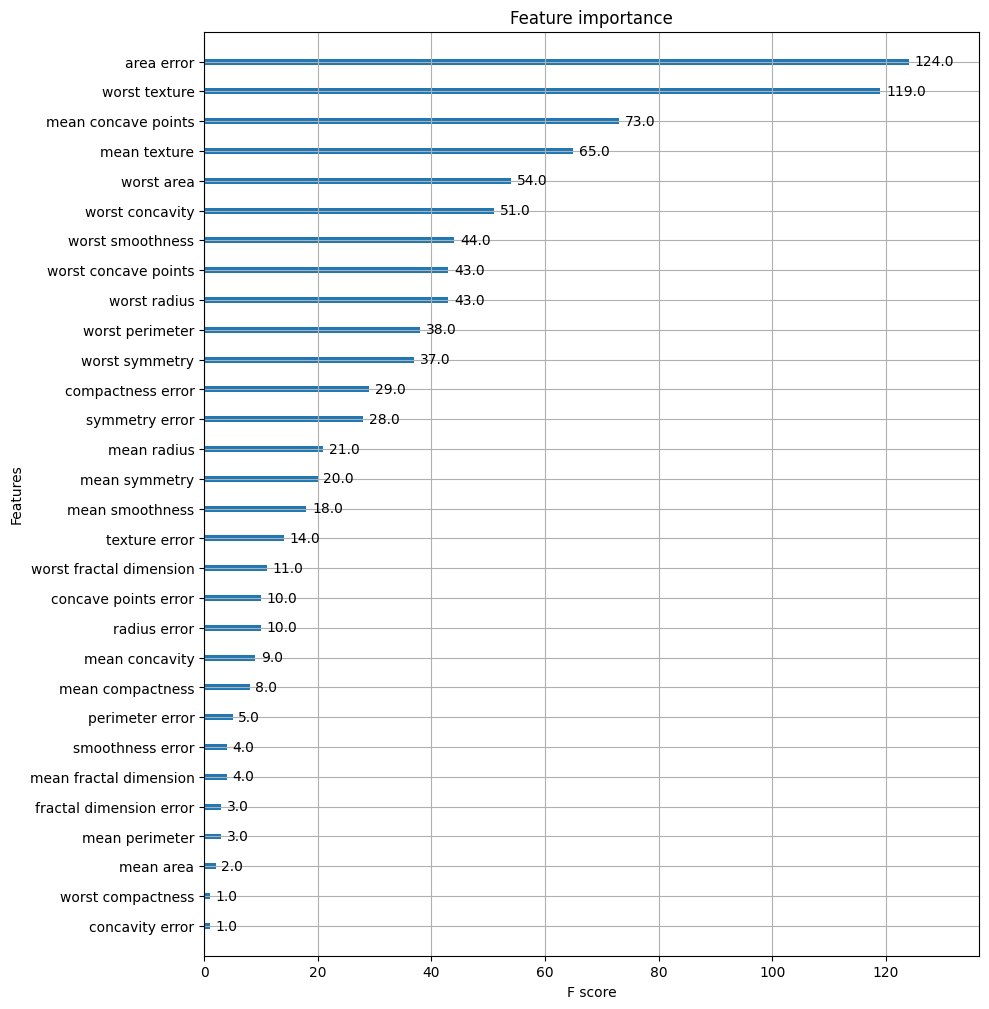

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)

In [ ]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3,eval_metric='logloss')
xgb_wrapper.fit(X_train, y_train, verbose=True)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

In [ ]:
get_clf_eval(y_test, w_preds)

In [ ]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3)
evals=[(x_tr,y_tr),(X_val, y_val)]
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric='logloss', eval_set=evals, verbose=True)

ws1_preds = xgb_wrapper.predict(X_test)
ws1_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

NameError: name 'x_tr' is not defined

In [ ]:
get_clf_eval(y_test, ws50_preds, ws50_pred_proba)

NameError: name 'ws50_preds' is not defined

In [ ]:
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=10, eval_metric='logloss', eval_set=evals, verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]
get_clf_eval(y_test, ws10_preds, ws_pred_proba)

NameError: name 'evals' is not defined

NotFittedError: need to call fit or load_model beforehand

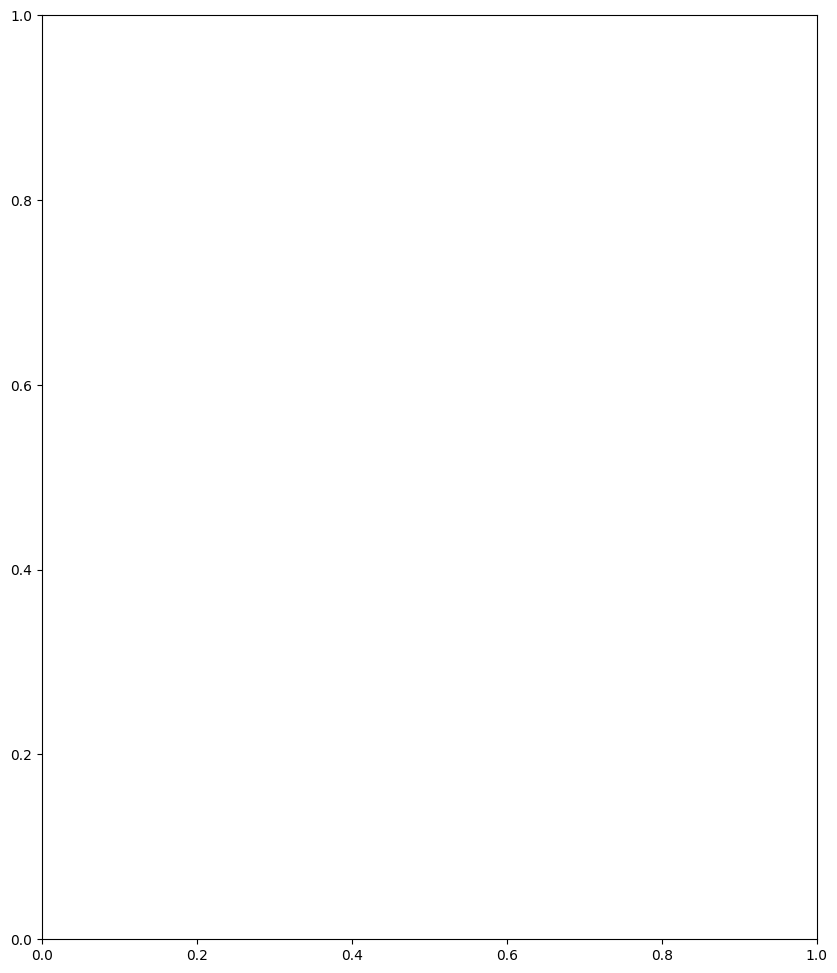

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_wrapper, ax=ax)